In [162]:
#Import bilbiotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.feature_selection import chi2
import xgboost as xgb
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)

In [163]:
#Załadowanie zbioru danych
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [164]:
df

,Date,Time,Round,Day,Venue,Result,Opponent,Season,Team,Result_rolling,GF_rolling,GA_rolling,Poss_rolling,Attendance_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling,SoTA_rolling,PKA_rolling,PKsv_rolling,PKm_rolling,Cmp_Total_rolling,Att_Total_rolling,TotDist_rolling,PrgDist_rolling,TI_rolling,CK_rolling,SCA_rolling,GCA_rolling,Tkl_Defensive_rolling,TklW_Defensive_rolling,Blocks_Defensive_rolling,Touches_rolling,Def Pen_rolling,Def 3rd_rolling,Mid 3rd_rolling,Att 3rd_rolling,Dribbles_Succ_rolling,Dribles_Att_rolling,Rec_rolling,CrdY_rolling,CrdR_rolling,2CrdY_rolling,Fls_rolling,Fld_rolling,Off_rolling,PKwon_rolling,PKcon_rolling,OG_rolling
0,2017-09-25,20,6,1,0,2,25,2017,0,1.0,1.4,1.6,60.6,48558.4,16.2,5.4,17.50,0.2,0.0,0.0,4.6,0.0,0.0,0.0,526.2,644.6,8902.2,3081.6,20.2,6.4,30.2,2.4,17.2,13.2,7.2,747.0,54.0,192.2,360.6,201.2,11.0,15.2,522.8,1.4,0.0,0.0,11.6,8.6,3.8,0.0,0.0,0.0
1,2017-10-01,12,7,7,0,2,4,2017,0,1.0,1.0,1.0,60.8,48507.8,13.8,4.4,17.38,0.8,0.2,0.2,4.4,0.0,0.0,0.0,526.2,640.4,8894.8,3118.8,19.8,6.0,25.4,1.4,15.6,11.6,7.0,741.2,54.0,185.8,361.6,200.4,10.4,15.2,522.8,1.6,0.0,0.0,11.4,9.6,2.8,0.2,0.0,0.0
2,2017-10-14,17,8,6,1,0,24,2017,0,1.4,1.4,0.8,58.4,54491.6,15.2,4.8,17.44,1.2,0.2,0.2,3.8,0.0,0.0,0.0,518.6,630.2,8672.8,2997.0,19.0,5.4,27.2,2.0,15.6,11.6,8.0,734.6,57.8,184.6,353.2,202.8,9.2,13.8,516.0,1.6,0.0,0.0,10.6,10.2,2.6,0.2,0.0,0.0
3,2017-10-22,13,9,7,1,2,9,2017,0,1.4,1.6,0.4,58.8,47927.2,15.4,6.0,18.24,1.2,0.2,0.2,2.2,0.2,0.0,0.0,518.4,631.8,8820.4,3048.0,18.4,5.8,27.4,2.2,16.6,11.8,9.0,736.8,57.8,189.0,347.6,205.4,7.8,11.6,515.0,0.8,0.0,0.0,10.8,10.6,1.6,0.2,0.2,0.0
4,2017-10-28,15,10,6,0,2,22,2017,0,1.4,2.0,0.8,60.6,43912.6,18.0,7.0,18.44,1.4,0.2,0.2,2.4,0.2,0.0,0.0,529.4,639.6,8944.6,3106.8,19.2,5.2,31.2,3.2,15.8,11.2,9.8,744.4,55.6,193.8,349.4,205.8,8.4,11.8,525.8,1.0,0.0,0.0,10.8,11.6,1.0,0.2,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,2022-04-30,15,34,6,0,0,4,2021,27,0.8,1.0,1.2,56.0,34675.2,10.8,4.2,18.96,0.0,0.0,0.0,4.2,0.4,0.0,0.0,452.8,552.8,8124.6,2679.2,20.2,3.2,19.0,1.6,20.4,11.2,10.6,655.6,64.6,230.6,304.0,127.0,10.4,20.2,447.6,2.0,0.2,0.2,11.8,9.2,0.8,0.0,0.4,0.0
3656,2022-05-07,15,35,6,1,1,7,2021,27,0.4,0.8,1.8,53.6,33101.4,10.2,3.8,18.38,0.2,0.0,0.0,5.6,0.6,0.0,0.2,423.4,526.6,7495.4,2532.8,20.6,4.2,17.2,1.2,21.8,12.2,11.6,625.8,66.8,236.2,278.0,117.6,11.2,21.6,418.2,2.2,0.2,0.2,10.8,7.6,1.0,0.0,0.8,0.0
3657,2022-05-11,20,36,3,0,0,15,2021,27,0.6,0.8,1.6,52.2,33171.0,10.2,3.0,17.32,0.2,0.0,0.0,5.8,0.8,0.0,0.2,408.6,510.4,7092.2,2428.2,19.0,4.4,16.4,1.4,22.4,12.6,10.4,611.2,70.2,235.2,270.8,111.2,11.0,19.0,403.4,2.2,0.0,0.0,10.4,6.2,1.0,0.0,1.0,0.0
3658,2022-05-15,14,37,7,0,1,18,2021,27,0.2,0.6,2.4,49.2,33368.6,9.4,2.8,17.70,0.2,0.0,0.0,5.8,0.6,0.0,0.2,404.4,502.6,7065.4,2395.0,16.6,4.8,15.8,1.4,21.0,12.2,9.4,599.4,71.0,233.4,266.2,104.8,11.0,19.4,399.6,1.4,0.0,0.0,7.8,6.4,1.2,0.0,0.8,0.0


In [165]:
X = df.drop(columns=['Result', 'Date'], axis=1)
#X = df.drop(columns=['Result', 'Date', 'Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue'], axis=1)
y = df['Result']
zmienne = ['Result_rolling','GF_rolling','GA_rolling','Poss_rolling','Attendance_rolling','Sh_rolling','SoT_rolling','Dist_rolling','FK_rolling','PK_rolling','PKatt_rolling',	'SoTA_rolling',	'PKA_rolling',	'PKsv_rolling',	'PKm_rolling',	'Cmp_Total_rolling',	'Att_Total_rolling',	'TotDist_rolling',	'PrgDist_rolling',	'TI_rolling','CK_rolling','SCA_rolling','GCA_rolling','Tkl_Defensive_rolling','TklW_Defensive_rolling',	'Blocks_Defensive_rolling',	'Touches_rolling',	'Def Pen_rolling',	'Def 3rd_rolling','Mid 3rd_rolling','Att 3rd_rolling','Dribbles_Succ_rolling','Dribles_Att_rolling','Rec_rolling','CrdY_rolling','CrdR_rolling','2CrdY_rolling','Fls_rolling','Fld_rolling','Off_rolling','PKwon_rolling','PKcon_rolling','OG_rolling']
#Normalizacja danych
#scale = MinMaxScaler()
#scale = StandardScaler()
#scale.fit(X[zmienne])
#scale.transform(X[zmienne])
#df_scaled = pd.DataFrame(scale.transform(X[zmienne]), columns = zmienne)
#X = pd.concat([X.drop(zmienne, axis = 1), df_scaled], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X
#X


,Time,Round,Day,Venue,Opponent,Season,Team,Result_rolling,GF_rolling,GA_rolling,Poss_rolling,Attendance_rolling,Sh_rolling,SoT_rolling,Dist_rolling,FK_rolling,PK_rolling,PKatt_rolling,SoTA_rolling,PKA_rolling,PKsv_rolling,PKm_rolling,Cmp_Total_rolling,Att_Total_rolling,TotDist_rolling,PrgDist_rolling,TI_rolling,CK_rolling,SCA_rolling,GCA_rolling,Tkl_Defensive_rolling,TklW_Defensive_rolling,Blocks_Defensive_rolling,Touches_rolling,Def Pen_rolling,Def 3rd_rolling,Mid 3rd_rolling,Att 3rd_rolling,Dribbles_Succ_rolling,Dribles_Att_rolling,Rec_rolling,CrdY_rolling,CrdR_rolling,2CrdY_rolling,Fls_rolling,Fld_rolling,Off_rolling,PKwon_rolling,PKcon_rolling,OG_rolling
0,20,6,1,0,25,2017,0,1.0,1.4,1.6,60.6,48558.4,16.2,5.4,17.50,0.2,0.0,0.0,4.6,0.0,0.0,0.0,526.2,644.6,8902.2,3081.6,20.2,6.4,30.2,2.4,17.2,13.2,7.2,747.0,54.0,192.2,360.6,201.2,11.0,15.2,522.8,1.4,0.0,0.0,11.6,8.6,3.8,0.0,0.0,0.0
1,12,7,7,0,4,2017,0,1.0,1.0,1.0,60.8,48507.8,13.8,4.4,17.38,0.8,0.2,0.2,4.4,0.0,0.0,0.0,526.2,640.4,8894.8,3118.8,19.8,6.0,25.4,1.4,15.6,11.6,7.0,741.2,54.0,185.8,361.6,200.4,10.4,15.2,522.8,1.6,0.0,0.0,11.4,9.6,2.8,0.2,0.0,0.0
2,17,8,6,1,24,2017,0,1.4,1.4,0.8,58.4,54491.6,15.2,4.8,17.44,1.2,0.2,0.2,3.8,0.0,0.0,0.0,518.6,630.2,8672.8,2997.0,19.0,5.4,27.2,2.0,15.6,11.6,8.0,734.6,57.8,184.6,353.2,202.8,9.2,13.8,516.0,1.6,0.0,0.0,10.6,10.2,2.6,0.2,0.0,0.0
3,13,9,7,1,9,2017,0,1.4,1.6,0.4,58.8,47927.2,15.4,6.0,18.24,1.2,0.2,0.2,2.2,0.2,0.0,0.0,518.4,631.8,8820.4,3048.0,18.4,5.8,27.4,2.2,16.6,11.8,9.0,736.8,57.8,189.0,347.6,205.4,7.8,11.6,515.0,0.8,0.0,0.0,10.8,10.6,1.6,0.2,0.2,0.0
4,15,10,6,0,22,2017,0,1.4,2.0,0.8,60.6,43912.6,18.0,7.0,18.44,1.4,0.2,0.2,2.4,0.2,0.0,0.0,529.4,639.6,8944.6,3106.8,19.2,5.2,31.2,3.2,15.8,11.2,9.8,744.4,55.6,193.8,349.4,205.8,8.4,11.8,525.8,1.0,0.0,0.0,10.8,11.6,1.0,0.2,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,15,34,6,0,4,2021,27,0.8,1.0,1.2,56.0,34675.2,10.8,4.2,18.96,0.0,0.0,0.0,4.2,0.4,0.0,0.0,452.8,552.8,8124.6,2679.2,20.2,3.2,19.0,1.6,20.4,11.2,10.6,655.6,64.6,230.6,304.0,127.0,10.4,20.2,447.6,2.0,0.2,0.2,11.8,9.2,0.8,0.0,0.4,0.0
3656,15,35,6,1,7,2021,27,0.4,0.8,1.8,53.6,33101.4,10.2,3.8,18.38,0.2,0.0,0.0,5.6,0.6,0.0,0.2,423.4,526.6,7495.4,2532.8,20.6,4.2,17.2,1.2,21.8,12.2,11.6,625.8,66.8,236.2,278.0,117.6,11.2,21.6,418.2,2.2,0.2,0.2,10.8,7.6,1.0,0.0,0.8,0.0
3657,20,36,3,0,15,2021,27,0.6,0.8,1.6,52.2,33171.0,10.2,3.0,17.32,0.2,0.0,0.0,5.8,0.8,0.0,0.2,408.6,510.4,7092.2,2428.2,19.0,4.4,16.4,1.4,22.4,12.6,10.4,611.2,70.2,235.2,270.8,111.2,11.0,19.0,403.4,2.2,0.0,0.0,10.4,6.2,1.0,0.0,1.0,0.0
3658,14,37,7,0,18,2021,27,0.2,0.6,2.4,49.2,33368.6,9.4,2.8,17.70,0.2,0.0,0.0,5.8,0.6,0.0,0.2,404.4,502.6,7065.4,2395.0,16.6,4.8,15.8,1.4,21.0,12.2,9.4,599.4,71.0,233.4,266.2,104.8,11.0,19.4,399.6,1.4,0.0,0.0,7.8,6.4,1.2,0.0,0.8,0.0


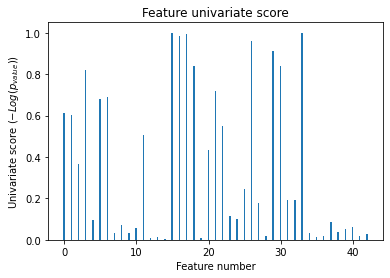

In [166]:
#Anova dla numerical Input

from sklearn.feature_selection import SelectKBest, f_classif

X_Anova = df.drop(columns=['Result', 'Date', 'Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue'], axis=1)
y = df['Result']
X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(X_Anova, y, test_size=0.15, random_state=42)
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train_anova, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
import matplotlib.pyplot as plt

X_indices = np.arange(X_Anova.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

Feature 0: 13.145867
Feature 1: 0.000667
Feature 2: 3.297975
Feature 3: 3.218842
Feature 4: 0.648591
Feature 5: 1.773585
Feature 6: 23.238566


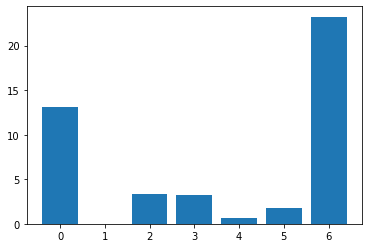

In [167]:

# Chi squared Kategoryczne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
 

 
# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder()
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc
 
 
# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 

X_Chi = df[['Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue']]
y = df['Result']
# split into train and test sets
X_train_Chi, X_test_Chi, y_train, y_test = train_test_split(X_Chi, y, test_size=0.15, random_state=1)


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_Chi, y_train, X_test_Chi)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

[0.0219844  0.02331662 0.02123246 0.01848835 0.02592127 0.01771025
 0.01978328 0.02262106 0.02082697 0.02285047 0.02102466 0.02185131
 0.02203676 0.02264307 0.02355618 0.02153934 0.01330233 0.01437409
 0.02283155 0.01447579 0.00788484 0.00365742 0.01993846 0.02017625
 0.02045973 0.02245853 0.02301014 0.02396985 0.02311116 0.02224874
 0.02314763 0.02309465 0.02293758 0.02046117 0.02326576 0.02196579
 0.02168108 0.02212831 0.02276962 0.02256407 0.02004443 0.02345606
 0.01263704 0.00721486 0.02434674 0.02277727 0.02340844 0.01392787
 0.01522558 0.01366069]


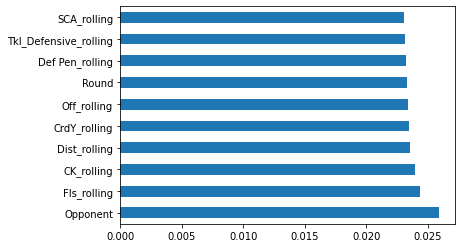

In [168]:
#Feature importance ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
#plot 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.01785522 0.02093427 0.01960154 0.01830454 0.01823062 0.01840636
 0.0186901  0.01936088 0.0183028  0.01899058 0.02013203 0.02123734
 0.01874363 0.0199513  0.02149043 0.01963911 0.01713451 0.01933138
 0.0181054  0.02338048 0.02053165 0.01134295 0.02187234 0.01853539
 0.02124022 0.02241424 0.02039251 0.02095927 0.02241976 0.02011574
 0.01880708 0.02063461 0.02052815 0.02261892 0.02284778 0.01931902
 0.02204544 0.01989817 0.02208142 0.01991342 0.02283558 0.01928804
 0.0154873  0.01920428 0.01976618 0.01913398 0.01968973 0.02191127
 0.02443072 0.02191233]


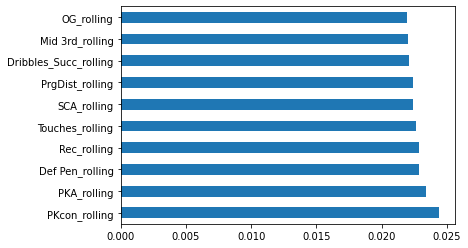

In [169]:
from xgboost import XGBClassifier
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [170]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
importance = model.feature_importances_
print(model.feature_importances_)
# plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.01692627 0.02793042 0.01241385 0.00585442 0.02707122 0.00952846
 0.01651519 0.01547747 0.01622349 0.01880265 0.02513564 0.0274462
 0.02459327 0.02326314 0.03089632 0.01401798 0.00619652 0.00656146
 0.02518802 0.006235   0.00293293 0.00137144 0.0238202  0.02352427
 0.02539366 0.02953203 0.02963478 0.02664956 0.02787379 0.02149914
 0.02905271 0.02683625 0.02713749 0.02508026 0.03020861 0.03052153
 0.02757557 0.02858194 0.02795957 0.02820136 0.02394515 0.02150748
 0.0050119  0.00295115 0.02742245 0.02771253 0.02333164 0.00625176
 0.00787171 0.00433017]


In [171]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.15, random_state=42)
df = pd.DataFrame(X_selected)
df



,0,1,2,3,4,5,6,7,8,9
0,60.6,5.4,526.2,644.6,8902.2,3081.6,747.0,360.6,201.2,522.8
1,60.8,4.4,526.2,640.4,8894.8,3118.8,741.2,361.6,200.4,522.8
2,58.4,4.8,518.6,630.2,8672.8,2997.0,734.6,353.2,202.8,516.0
3,58.8,6.0,518.4,631.8,8820.4,3048.0,736.8,347.6,205.4,515.0
4,60.6,7.0,529.4,639.6,8944.6,3106.8,744.4,349.4,205.8,525.8
...,...,...,...,...,...,...,...,...,...,...
3655,56.0,4.2,452.8,552.8,8124.6,2679.2,655.6,304.0,127.0,447.6
3656,53.6,3.8,423.4,526.6,7495.4,2532.8,625.8,278.0,117.6,418.2
3657,52.2,3.0,408.6,510.4,7092.2,2428.2,611.2,270.8,111.2,403.4
3658,49.2,2.8,404.4,502.6,7065.4,2395.0,599.4,266.2,104.8,399.6


In [172]:
from sklearn.ensemble import RandomForestClassifier
classifier_1 = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
classifier_1.fit(X_train, y_train)
preds = classifier_1.predict(X_test)
accuracy_score(y_test, classifier_1.predict(X_test))



0.4663023679417122

In [173]:
comparison = pd.DataFrame(dict(actual=y_test, predicted=preds))
comparison

,actual,predicted
291,1,0
270,2,0
149,0,1
1188,0,0
2037,2,2
...,...,...
1650,2,0
88,1,2
718,2,0
2605,1,0


In [174]:
fs = SelectKBest(score_func=f_classif, k=2)
X_selected = fs.fit_transform(X, y)

In [175]:
discrete_feat_idx = [0, 6] # an array with indices of discrete features
score_func = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
s = SelectKBest(score_func)
X_selected = s.fit_transform(X,y)
X_table = pd.DataFrame(X_selected)
X_table

,0,1,2,3,4,5,6,7,8,9
0,25.0,0.0,5.4,526.2,8902.2,3081.6,30.2,747.0,360.6,522.8
1,4.0,0.0,4.4,526.2,8894.8,3118.8,25.4,741.2,361.6,522.8
2,24.0,0.0,4.8,518.6,8672.8,2997.0,27.2,734.6,353.2,516.0
3,9.0,0.0,6.0,518.4,8820.4,3048.0,27.4,736.8,347.6,515.0
4,22.0,0.0,7.0,529.4,8944.6,3106.8,31.2,744.4,349.4,525.8
...,...,...,...,...,...,...,...,...,...,...
3655,4.0,27.0,4.2,452.8,8124.6,2679.2,19.0,655.6,304.0,447.6
3656,7.0,27.0,3.8,423.4,7495.4,2532.8,17.2,625.8,278.0,418.2
3657,15.0,27.0,3.0,408.6,7092.2,2428.2,16.4,611.2,270.8,403.4
3658,18.0,27.0,2.8,404.4,7065.4,2395.0,15.8,599.4,266.2,399.6


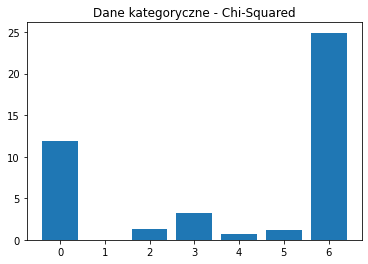

,Value
Venue,24.914839
Round,11.862887
Team,3.254032
Opponent,1.299294
Day,1.236098
Time,0.659264


In [176]:
#Kategoryczne dane chi2
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])
X_Chi = df[['Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue']]
y = df['Result']
X_train_Chi, X_test_Chi, y_train, y_test = train_test_split(X_Chi, y, test_size=0.1, random_state=1)
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_Chi, y_train)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Dane kategoryczne - Chi-Squared")
plt.show()
#new_df = pd.DataFrame(X_Chi.columns, fs.scores_)
#new_df
new_df = pd.DataFrame(fs.scores_)
new_df_1 = pd.DataFrame.transpose(new_df)
new_df_1.columns= X_Chi.columns
new_df_2 = pd.DataFrame.transpose(new_df_1)
new_df_2.columns = ['Value']
new_df_2.sort_values('Value', ascending = False, inplace = True)
new_df_2.head(6)



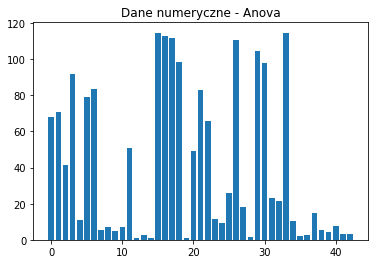

,Value
Rec_rolling,114.606131
Cmp_Total_rolling,114.561183
Att_Total_rolling,112.781353
TotDist_rolling,111.870327
Touches_rolling,110.617065
Mid 3rd_rolling,104.320283
PrgDist_rolling,98.227418
Att 3rd_rolling,97.882520
Poss_rolling,91.761110
SoT_rolling,83.404894


In [177]:
#Dane numeryczne anova
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])
X_Anova = df.drop(columns=['Result', 'Date', 'Round', 'Season', 'Opponent', 'Team', 'Time', 'Day', 'Venue'], axis=1)
y = df['Result']
X_train_anova, X_test_anova, y_train, y_test = train_test_split(X_Anova, y, test_size=0.1, random_state=1)
fs = SelectKBest(f_classif, k='all')
fs.fit(X_train_anova, y_train)
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Dane numeryczne - Anova")
pyplot.show()
new_df = pd.DataFrame(X_Anova.columns, fs.scores_)
new_df = pd.DataFrame(fs.scores_)
new_df_1 = pd.DataFrame.transpose(new_df)
new_df_1.columns= X_Anova.columns
new_df_2 = pd.DataFrame.transpose(new_df_1)
new_df_2.columns = ['Value']
new_df_2.sort_values('Value', ascending = False, inplace = True)
new_df_2.head(10)

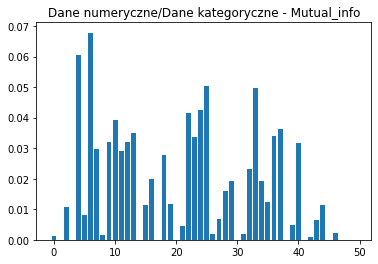

,Value
Team,0.067816
Opponent,0.060630
PrgDist_rolling,0.050464
Touches_rolling,0.049766
TotDist_rolling,0.042594
Cmp_Total_rolling,0.041633
Poss_rolling,0.039244
Att 3rd_rolling,0.036302
SoT_rolling,0.035125
Mid 3rd_rolling,0.033927


In [178]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])
X = df.drop(columns=['Result', 'Date'], axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
score_func = partial(mutual_info_classif, discrete_features=[0, 6])
fs = SelectKBest(score_func, k=10)
fs.fit(X_train, y_train)
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Dane numeryczne/Dane kategoryczne - Mutual_info")
pyplot.show()

new_df = pd.DataFrame(fs.scores_)
new_df_1 = pd.DataFrame.transpose(new_df)
new_df_1.columns= X.columns
new_df_2 = pd.DataFrame.transpose(new_df_1)
new_df_2.columns = ['Value']
new_df_2.sort_values('Value', ascending = False, inplace = True)
new_df_2.head(15)


#Bez standaryzacji danych
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

df = pd.read_csv("EPL_2017-2021.csv")
X = df[['Team', 'Opponent', 'PrgDist_rolling', 'Touches_rolling', 'Mid 3rd_rolling', 'TotDist_rolling', 'Att 3rd_rolling', 'Poss_rolling', 'Result_rolling', 'Cmp_Total_rolling', 'Att_Total_rolling', 'Rec_rolling', 'Fls_rolling', 'Attendance_rolling', 'SoTA_rolling']]
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state =42)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models



from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
df = pd.read_csv("EPL_2017-2021.csv")
X = df[['Team', 'Opponent', 'PrgDist_rolling', 'Touches_rolling', 'Mid 3rd_rolling', 'TotDist_rolling', 'Att 3rd_rolling', 'Poss_rolling', 'Result_rolling', 'Cmp_Total_rolling', 'Att_Total_rolling', 'Rec_rolling', 'Fls_rolling', 'Attendance_rolling', 'SoTA_rolling']]
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state =42)
clf = MLPClassifier(hidden_layer_sizes=100,random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

# 02.01.2023 XGBoost

In [241]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

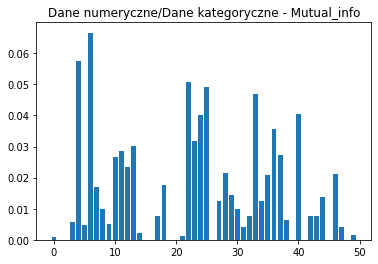

In [242]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
df = pd.read_csv("EPL_2017-2021.csv")
df['Date'] = pd.to_datetime(df['Date'])
X = df.drop(columns=['Result', 'Date'], axis=1)
y = df['Result']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
score_func = partial(mutual_info_classif, discrete_features=[0, 6])
fs = SelectKBest(score_func, k=5)
X_new = fs.fit_transform(X, y)
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Dane numeryczne/Dane kategoryczne - Mutual_info")
pyplot.show()


In [311]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,  
                            eval_metric=['merror','mlogloss'], 
                            seed=42,
                            n_estimators=12)

In [312]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=1)
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=0)
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
results = xgb_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)


Accuracy: 53.73%


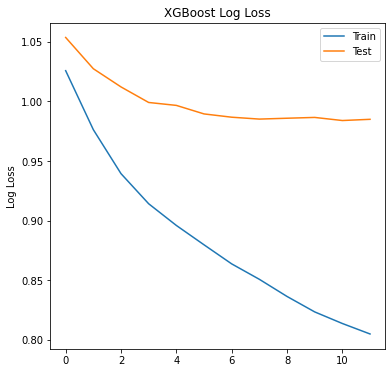

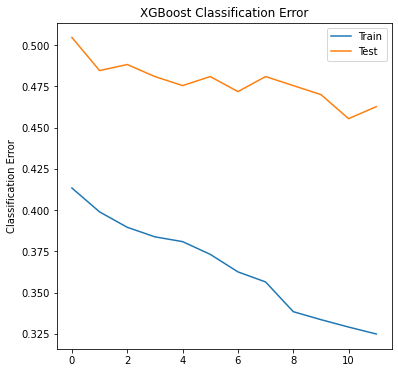

In [313]:
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
    
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
    
    
# plot classification error
fig, ax = pyplot.subplots(figsize=(6,6))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
    
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [314]:
print(classification_report(y_test, y_pred))
#score = accuracy_score(y_test, y_pred)
#print('Accuracy: %.3f' % score)

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       207
           1       0.42      0.09      0.14       127
           2       0.56      0.67      0.61       215

    accuracy                           0.54       549
   macro avg       0.50      0.48      0.45       549
weighted avg       0.52      0.54      0.50       549



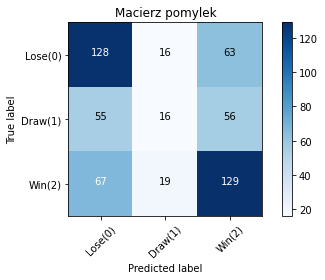

In [235]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Lose(0)', 'Draw(1)', 'Win(2)'],
                      title='Macierz pomylek')

Best: -0.999579 using {'n_estimators': 12}
-1.030990 (0.009541) with: {'n_estimators': 2}
-1.008527 (0.012879) with: {'n_estimators': 4}
-1.001981 (0.016164) with: {'n_estimators': 6}
-1.001168 (0.018587) with: {'n_estimators': 8}
-0.999774 (0.018303) with: {'n_estimators': 10}
-0.999579 (0.019453) with: {'n_estimators': 12}
-1.002008 (0.020145) with: {'n_estimators': 14}
-1.003783 (0.020810) with: {'n_estimators': 16}
-1.006137 (0.021577) with: {'n_estimators': 18}
-1.008472 (0.022980) with: {'n_estimators': 20}
-1.011754 (0.022129) with: {'n_estimators': 22}
-1.014041 (0.021289) with: {'n_estimators': 24}
-1.017887 (0.020216) with: {'n_estimators': 26}
-1.021055 (0.020690) with: {'n_estimators': 28}
-1.023298 (0.020943) with: {'n_estimators': 30}
-1.026752 (0.021292) with: {'n_estimators': 32}
-1.029413 (0.022447) with: {'n_estimators': 34}
-1.031267 (0.023357) with: {'n_estimators': 36}
-1.034535 (0.024485) with: {'n_estimators': 38}
-1.036626 (0.024966) with: {'n_estimators': 40}
-

Text(0, 0.5, 'Log Loss')

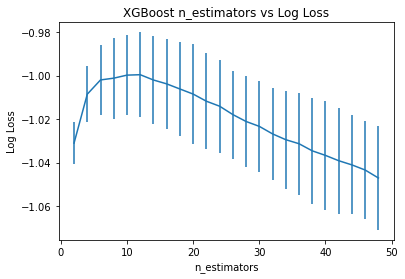

In [310]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,  
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
n_estimators = range(2, 50, 2)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')